# Par-Rate Bumps for Libor Curves
Investigate the impact of a par rate bump (bump to a curve benchmark used in curve building) on the curve

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
from timeit import default_timer as timer

In [3]:
from financepy.utils import *
from financepy.products.rates import *
from financepy.products.rates.ibor_single_curve_par_shocker import IborSingleCurveParShocker

In [4]:
valuation_date = Date(6, 10, 2001)
cal = CalendarTypes.UNITED_KINGDOM

### Instruments

In [5]:
depo_dcc_type = DayCountTypes.ACT_360
depos = []
spot_days = 2
settle_dt = valuation_date.add_weekdays(spot_days)
depo = IborDeposit(settle_dt, "3M", 4.2/100.0, depo_dcc_type, cal_type=cal)
depos.append(depo)

fraDCCType = DayCountTypes.ACT_360
fras = []
fra = IborFRA(settle_dt.add_tenor("3M"), "3M", 4.20/100.0, fraDCCType, cal_type=cal)
fras.append(fra)

swaps = []
swapType = SwapTypes.PAY
fixedDCCType = DayCountTypes.THIRTY_E_360_ISDA
fixed_freqType = FrequencyTypes.SEMI_ANNUAL

swap = IborSwap(settle_dt, "1Y", swapType, 4.20/100.0, fixed_freqType, fixedDCCType, cal_type=cal)
swaps.append(swap)
swap = IborSwap(settle_dt, "2Y", swapType, 4.30/100.0, fixed_freqType, fixedDCCType, cal_type=cal)
swaps.append(swap)
swap = IborSwap(settle_dt, "3Y", swapType, 4.70/100.0, fixed_freqType, fixedDCCType, cal_type=cal)
swaps.append(swap)
swap = IborSwap(settle_dt, "5Y", swapType, 5.40/100.0, fixed_freqType, fixedDCCType, cal_type=cal)
swaps.append(swap)
swap = IborSwap(settle_dt, "7Y", swapType, 5.70/100.0, fixed_freqType, fixedDCCType, cal_type=cal)
swaps.append(swap)
swap = IborSwap(settle_dt, "10Y", swapType, 6.00/100.0, fixed_freqType, fixedDCCType, cal_type=cal)
swaps.append(swap)
swap = IborSwap(settle_dt, "12Y", swapType, 6.10/100.0, fixed_freqType, fixedDCCType, cal_type=cal)
swaps.append(swap)
swap = IborSwap(settle_dt, "15Y", swapType, 5.90/100.0, fixed_freqType, fixedDCCType, cal_type=cal)
swaps.append(swap)
swap = IborSwap(settle_dt, "20Y", swapType, 5.60/100.0, fixed_freqType, fixedDCCType, cal_type=cal)
swaps.append(swap)
swap = IborSwap(settle_dt, "25Y", swapType, 5.55/100.0, fixed_freqType, fixedDCCType, cal_type=cal)
swaps.append(swap)

Build curves using different interpolations

In [6]:
check_refit_flag = True
iborCurves = {}
iborCurveShockers = {}
optional_interp_params = {'sigma' : 0.01} # only relevant for interp_type == InterpTypes.TENSION_ZERO_RATES

interp_types_to_use = {
    'FF':(InterpTypes.FLAT_FWD_RATES,{}),
    'LF':(InterpTypes.LINEAR_FWD_RATES,{}),
    'LZ':(InterpTypes.LINEAR_ZERO_RATES,{}),
    'CZ':(InterpTypes.NATCUBIC_ZERO_RATES,{}),
    'TZ1':(InterpTypes.TENSION_ZERO_RATES,{'sigma' : 0.1}),
    'TZ2':(InterpTypes.TENSION_ZERO_RATES,{'sigma' : 2.0}),
    'TZ3':(InterpTypes.TENSION_ZERO_RATES,{'sigma' : 10.0}),
}

for key, interp_type in interp_types_to_use.items():
    print('Processing:', key, interp_type[0])
    ibor_curve = IborSingleCurve(valuation_date, depos, fras, swaps, interp_type[0], check_refit_flag=check_refit_flag, **interp_type[1])
    iborCurves[key] = ibor_curve
    curveShocker = IborSingleCurveParShocker(ibor_curve)
    iborCurveShockers[key] = curveShocker


Processing: FF InterpTypes.FLAT_FWD_RATES
Processing: LF InterpTypes.LINEAR_FWD_RATES
Processing: LZ InterpTypes.LINEAR_ZERO_RATES
Processing: CZ InterpTypes.NATCUBIC_ZERO_RATES


Processing: TZ1 InterpTypes.TENSION_ZERO_RATES


Processing: TZ2 InterpTypes.TENSION_ZERO_RATES


Processing: TZ3 InterpTypes.TENSION_ZERO_RATES


### Look at the benchmark report for one of the curves
(they all have the same benchmarks)


In [7]:
# Print DataFrames in full
pd.set_option('display.max_rows', None,
                    'display.max_columns', None,
                    'display.float_format', lambda x:f'{x:.4f}'
                    )

In [8]:
# examine the last fit_report
df_br = curveShocker.benchmarks_report()
df_br

,type,start_dt,maturity_dt,dc_type,notional,contract_rate,market_rate,spot_pvbp,fwd_pvbp,unit_value,value,fixed_leg_type,fixed_freq_type,benchmark_objects
0,IborDeposit,06-OCT-2001,09-OCT-2001,ACT_360,100.0000,0.0420,0.0420,0.0083,0.0083,1.0000,100.0000,NaN,NaN,OBJECT TYPE: IborDeposit\nSTART DATE: 06-OCT-2...
1,IborDeposit,09-OCT-2001,09-JAN-2002,ACT_360,100.0000,0.0420,0.0420,0.2528,0.2528,1.0000,100.0000,NaN,NaN,OBJECT TYPE: IborDeposit\nSTART DATE: 09-OCT-2...
2,IborFRA,09-JAN-2002,09-APR-2002,ACT_360,100.0000,0.0420,0.0420,0.2447,0.2474,0.0000,-0.0000,PAY,NaN,OBJECT TYPE: IborFRA\nSTART ACCD DATE: 09-JAN-...
3,IborSwap,09-OCT-2001,09-OCT-2002,THIRTY_E_360_ISDA,1000000,0.0420,0.0420,0.9689,0.9692,0.0000,0.0000,PAY,SEMI_ANNUAL,OBJECT TYPE: IborSwap\nOBJECT TYPE: SwapFixedL...
4,IborSwap,09-OCT-2001,09-OCT-2003,THIRTY_E_360_ISDA,1000000,0.0430,0.0430,1.8973,1.8980,0.0000,0.0000,PAY,SEMI_ANNUAL,OBJECT TYPE: IborSwap\nOBJECT TYPE: SwapFixedL...
5,IborSwap,09-OCT-2001,11-OCT-2004,THIRTY_E_360_ISDA,1000000,0.0470,0.0470,2.7837,2.7847,0.0000,0.0000,PAY,SEMI_ANNUAL,OBJECT TYPE: IborSwap\nOBJECT TYPE: SwapFixedL...
6,IborSwap,09-OCT-2001,09-OCT-2006,THIRTY_E_360_ISDA,1000000,0.0540,0.0540,4.3857,4.3873,0.0000,0.0003,PAY,SEMI_ANNUAL,OBJECT TYPE: IborSwap\nOBJECT TYPE: SwapFixedL...
7,IborSwap,09-OCT-2001,09-OCT-2008,THIRTY_E_360_ISDA,1000000,0.0570,0.0570,5.7938,5.7958,0.0000,0.0004,PAY,SEMI_ANNUAL,OBJECT TYPE: IborSwap\nOBJECT TYPE: SwapFixedL...
8,IborSwap,09-OCT-2001,10-OCT-2011,THIRTY_E_360_ISDA,1000000,0.0600,0.0600,7.5820,7.5847,0.0000,0.0008,PAY,SEMI_ANNUAL,OBJECT TYPE: IborSwap\nOBJECT TYPE: SwapFixedL...
9,IborSwap,09-OCT-2001,09-OCT-2013,THIRTY_E_360_ISDA,1000000,0.0610,0.0610,8.5828,8.5858,0.0000,0.0020,PAY,SEMI_ANNUAL,OBJECT TYPE: IborSwap\nOBJECT TYPE: SwapFixedL...


### Choose the benchmark to bump and apply the bump

In [9]:
par_rate_bump = 1*0.0001
benchmark_idx =7
print(df_br.loc[benchmark_idx])
bumped_curves = {}

for key, shocker in iborCurveShockers.items():
    print('Processing:', key)
    bumped_curve = shocker.apply_bump_to_benchmark(benchmark_idx, par_rate_bump)
    bumped_curves[key] = bumped_curve

type                                                          IborSwap
start_dt                                                   09-OCT-2001
maturity_dt                                                09-OCT-2008
dc_type                                              THIRTY_E_360_ISDA
notional                                                       1000000
contract_rate                                                   0.0570
market_rate                                                     0.0570
spot_pvbp                                                       5.7938
fwd_pvbp                                                        5.7958
unit_value                                                      0.0000
value                                                           0.0004
fixed_leg_type                                                     PAY
fixed_freq_type                                            SEMI_ANNUAL
benchmark_objects    OBJECT TYPE: IborSwap\nOBJECT TYPE: SwapFixedL...
Name: 

Processing: TZ1


Processing: TZ2


Processing: TZ3


### Curve Shape Analysis

Check instantaneous (ON) forward rates and see how they are affected by the par rate bump
We are looking how 'local' are the changes in fwd rates -- the further they extend beyond benchmarks
near the bumped one, the less local the bump and, generally, less financially justifyable the interpolation scheme

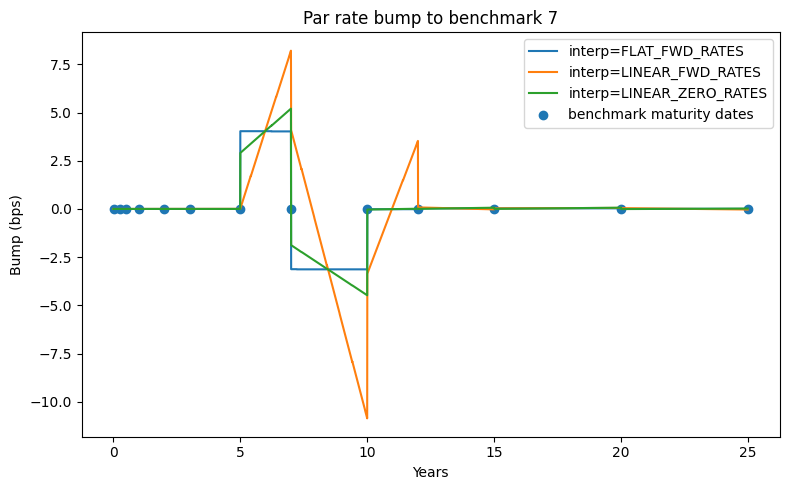

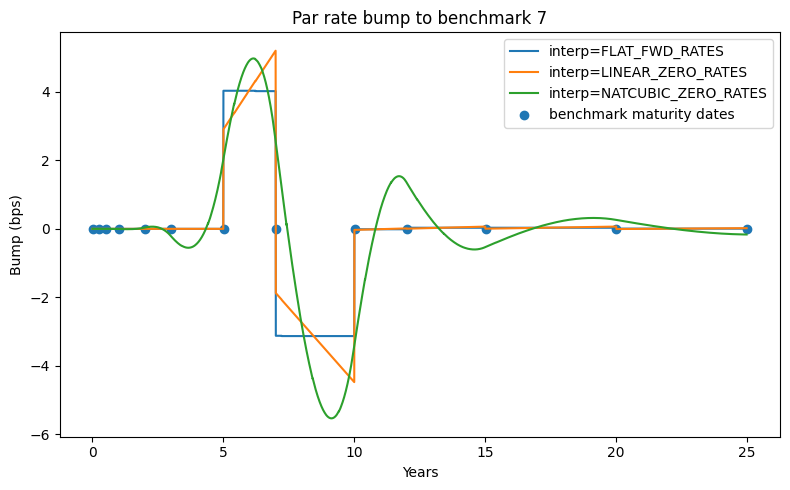

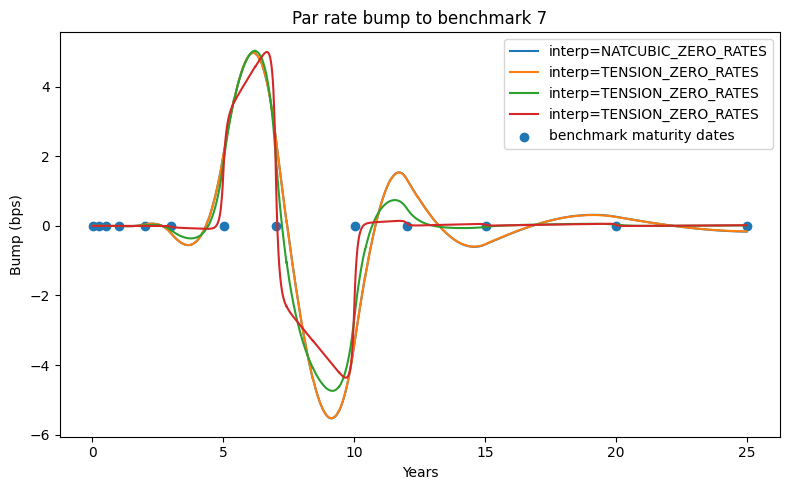

In [10]:
# %matplotlib widget  # keep only if you're in Jupyter

years = np.linspace(1.0/365.0, 25.0, int(25*365), endpoint=True)
plotDates = [settle_dt.add_years(float(y)) for y in years]  # list of Dates

benchmark_years = (df_br['maturity_dt'] - valuation_date) / G_DAYS_IN_YEAR
# ensure it's a 1D numpy array for plotting
benchmark_years = np.asarray(benchmark_years, dtype=float)

keys_to_plot_collections = [['FF', 'LF', 'LZ'], ['FF', 'LZ', 'CZ'], ['CZ', 'TZ1', 'TZ2', 'TZ3']]

for keys_to_plot in keys_to_plot_collections:
    plt.figure(figsize=(8, 5))

    for key in keys_to_plot:
        base_curve = iborCurves[key]
        bumped_curve = bumped_curves[key]

        base_fwd_rates   = base_curve.fwd(plotDates)    # expects list[Date]
        bumped_fwd_rates = bumped_curve.fwd(plotDates)

        # convert to numpy just in case theyÃƒÆ’Ã‚Â¢ÃƒÂ¢Ã¢â‚¬Å¡Ã‚Â¬ÃƒÂ¢Ã¢â‚¬Å¾Ã‚Â¢re lists
        base_fwd_rates   = np.asarray(base_fwd_rates, dtype=float)
        bumped_fwd_rates = np.asarray(bumped_fwd_rates, dtype=float)

        bump_bps = (bumped_fwd_rates - base_fwd_rates) * 10000.0
        label_interp = getattr(interp_types_to_use[key][0], "name", str(interp_types_to_use[key][0]))
        plt.plot(years, bump_bps, label=f"interp={label_interp}")

    # show benchmark maturities at zero bump
    plt.scatter(benchmark_years, np.zeros_like(benchmark_years), marker='o', label='benchmark maturity dates')

    plt.title(f'Par rate bump to benchmark {benchmark_idx}')
    plt.xlabel("Years")
    plt.ylabel("Bump (bps)")
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
